# Customer Churn Prediction

This notebook builds baseline churn prediction models using customer behavioral
features derived from RFM analysis. The goal is to identify customers who are
likely to churn and support proactive retention strategies.


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
rfm = pd.read_csv("../data/processed/rfm_features.csv")

rfm.head()


,frequency,recency,T,monetary_value,clv
0,5.0,328.0,328.0,700.054000,3971.200070
1,3.0,283.0,319.0,476.746667,1972.172095
2,5.0,224.0,257.0,217.866000,1488.829026
3,1.0,80.0,286.0,2271.620000,4471.324591
4,4.0,274.0,292.0,1306.865000,6946.865198


In [17]:
# Define churn based on inactivity (recency)
RECENCY_THRESHOLD = rfm["recency"].quantile(0.75)

rfm["churn"] = (rfm["recency"] > RECENCY_THRESHOLD).astype(int)

rfm["churn"].value_counts()


churn
0    1832
1     601
Name: count, dtype: int64

In [18]:
features = ["recency", "frequency", "monetary_value"]
X = rfm[features]
y = rfm["churn"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       550
           1       0.98      0.99      0.99       180

    accuracy                           0.99       730
   macro avg       0.99      0.99      0.99       730
weighted avg       0.99      0.99      0.99       730



In [22]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       180

    accuracy                           1.00       730
   macro avg       1.00      1.00      1.00       730
weighted avg       1.00      1.00      1.00       730



In [23]:
rfm["rfm_segment"] = pd.qcut(
    rfm["frequency"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [24]:
rfm["value_segment"] = pd.qcut(
    rfm["monetary_value"],
    q=3,
    labels=["Low Value", "Mid Value", "High Value"]
)


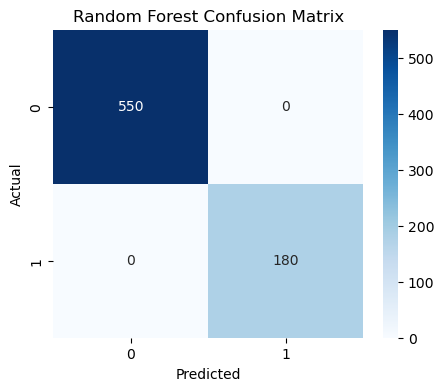

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


## Business Interpretation

Customers predicted as high churn risk can be targeted with retention campaigns,
personalized offers, or engagement incentives. When combined with CLV estimates,
high-value customers with high churn probability are prioritized for immediate
intervention, while low-value churn-prone customers are handled with cost-efficient
strategies.


## Actionable Recommendations

- High-CLV customers should be enrolled in loyalty and retention programs.
- Customers with high churn probability and high CLV require immediate intervention.
- Low-value, high-churn customers can be targeted with automated, low-cost campaigns.

